In [1]:
using HDF5

In [2]:
file_name = "C:/Users/Zakhar/Documents/GitHub/JPOP_SID/LiPoSID_clust_compare_methods_started_2022-Jul-15_at_15-12.h5"

"C:/Users/Zakhar/Documents/GitHub/JPOP_SID/LiPoSID_clust_compare_methods_started_2022-Jul-15_at_15-12.h5"

In [3]:
function get_seeds_and_timespan(file_name)   
    h5open(file_name,"r") do fid   # read file, preserve existing contents
        seeds = read(fid["seeds"])
        Δt = read(fid["dt"])
        tₘₐₓ = read(fid["t_max"])
        return seeds,  Δt, tₘₐₓ
    end
end

function get_noise_levels(file_name)   
    h5open(file_name,"r") do fid   # read file, preserve existing contents
        noise_levels = keys(fid["data_by_noise_level"])
        return noise_levels
    end
end

function get_variable_names(file_name, noise_level, seed)
        h5open(file_name,"r") do fid   # read file, preserve existing contents
        variable_names = keys(fid["data_by_noise_level"][string(noise_level)][string(seed)])
        return variable_names
    end
end

function get_by_name(file_name, var_name, noise_levels, seeds)
        h5open(file_name,"r") do fid # read file, preserve existing contents
        var_by_name = []
        for w in noise_levels
            current_noise_var = [ read(fid["data_by_noise_level"][string(w)][string(seed)][var_name]) for seed in seeds ]
            push!(var_by_name, current_noise_var)
        end
        return(var_by_name)
    end
end

get_by_name (generic function with 1 method)

In [4]:
seeds,  Δt, tₘₐₓ = get_seeds_and_timespan(file_name)
noise_levels = get_noise_levels(file_name)
get_variable_names(file_name, noise_levels[1], seeds[1])

19-element Vector{String}:
 "A"
 "C"
 "H_exact"
 "H_sid_pade"
 "H_sid_simp"
 "J_exact"
 "J_sid_pade"
 "J_sid_simp"
 "K1_sid"
 "K2_sid"
 "fidelity_kraus"
 "fidelity_lsid"
 "fidelity_pade"
 "fidelity_simp"
 "rho0"
 "tssos_iter_kraus"
 "tssos_iter_pade"
 "tssos_iter_simp"
 "x0"

In [5]:
fidelity_lsid = get_by_name(file_name, "fidelity_lsid", noise_levels, seeds)
fidelity_kraus = get_by_name(file_name, "fidelity_kraus", noise_levels, seeds)
fidelity_pade = get_by_name(file_name, "fidelity_pade", noise_levels, seeds)
fidelity_simp = get_by_name(file_name, "fidelity_simp", noise_levels, seeds);

In [6]:
using StatsPlots


(process:17552): GLib-GIO-WARNING **: 20:00:25.644: Unexpectedly, UWP app `Microsoft.MSPaint_6.2203.1037.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.MSPaint_8wekyb3d8bbwe!Microsoft.MSPaint') supports 17 extensions but has no verbs


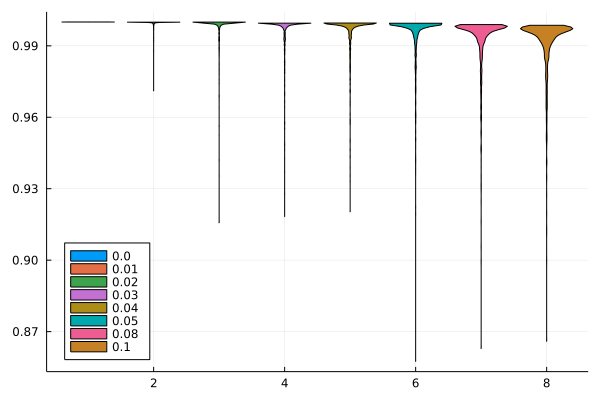

In [7]:
function violin_from_noise(fidelity)
    violin(fidelity[1], label="0.0", legend = :bottomleft)
    violin!(fidelity[2], label=noise_levels[2])
    violin!(fidelity[3], label=noise_levels[3])
    violin!(fidelity[4], label=noise_levels[4])
    violin!(fidelity[5], label=noise_levels[5])
    violin!(fidelity[6], label=noise_levels[6])
    violin!(fidelity[7], label=noise_levels[7])
    violin!(fidelity[8], label=noise_levels[8])
end

violin_from_noise(fidelity_lsid)

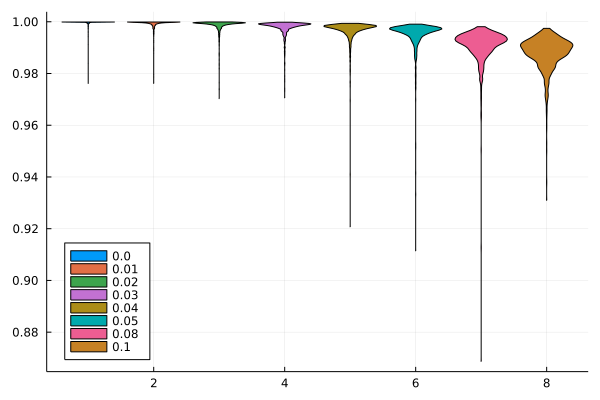

In [8]:
violin_from_noise(fidelity_kraus)

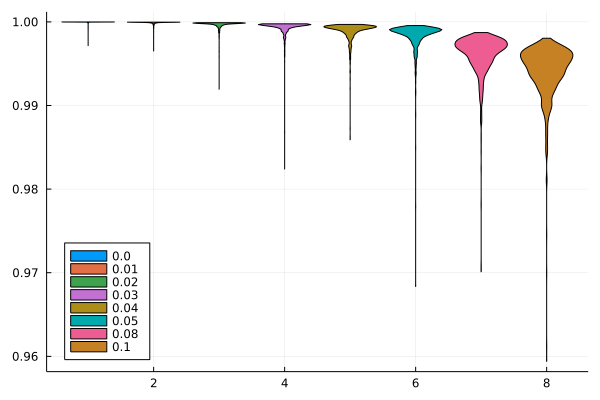

In [9]:
violin_from_noise(fidelity_pade)

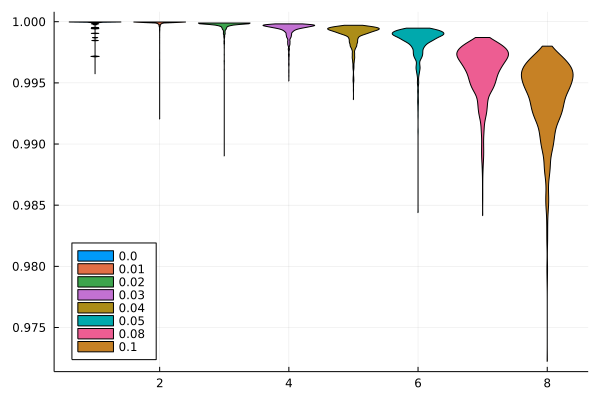

In [10]:
violin_from_noise(fidelity_simp)